In [2]:
import pandas as pd
names=['sepal_length','sepal_width','petal_length','petal_width','class']
df=pd.read_csv('iris.csv',header=None,names=names)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


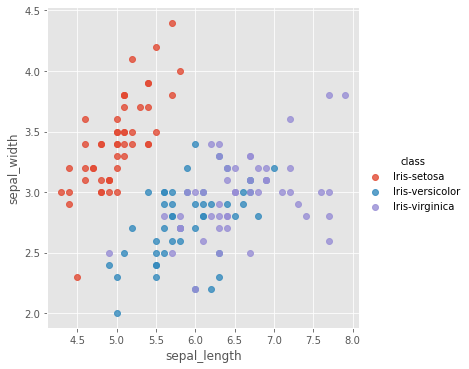

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.lmplot(x='sepal_length',y='sepal_width',data=df,fit_reg=False,hue='class')

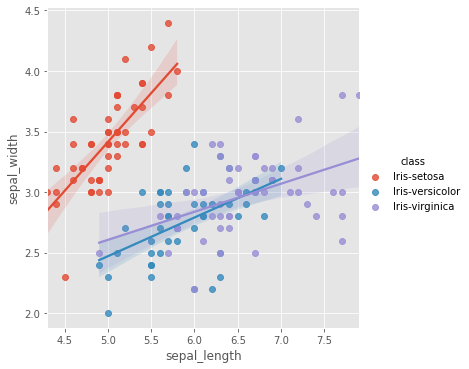

In [7]:
sns.lmplot(x='sepal_length',y='sepal_width',data=df,fit_reg=True,hue='class')

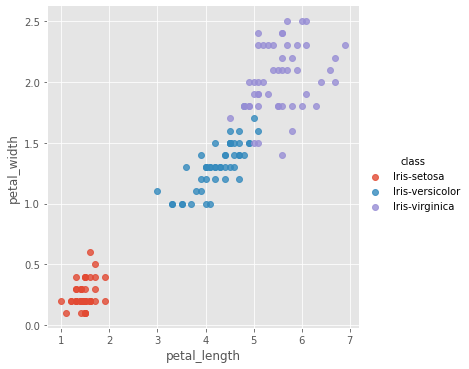

In [8]:
sns.lmplot(x='petal_length',y='petal_width',data=df,fit_reg=False,hue='class')

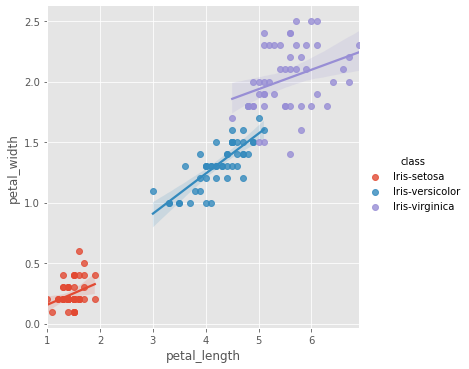

In [10]:
sns.lmplot(x='petal_length',y='petal_width',data=df,fit_reg=True,hue='class')

In [19]:
import numpy as np
from sklearn.model_selection import train_test_split

x=df.iloc[:,:-1].values
y=df.iloc[:,4].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=1)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train,y_train)

pred=knn.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.98

In [24]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(knn,x_train,y_train,cv=10,scoring='accuracy')
scores

array([1. , 1. , 0.9, 1. , 1. , 0.9, 1. , 0.8, 1. , 0.9])

In [25]:
scores.mean()

0.95

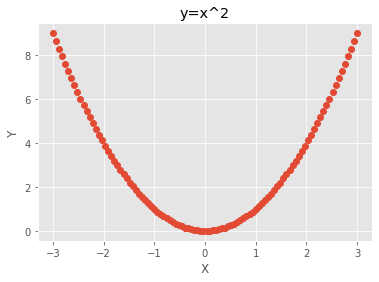

In [28]:
import numpy as np
import matplotlib.pyplot as plt

x=np.linspace(-3,3,100)
y=x**2
plt.plot(x,y,"o")
plt.title("y=x^2")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [29]:
from sklearn.model_selection import cross_val_score

neighbors=[x for x in range(1,50) if x%2!=0]
cv_score=[]

for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x_train,y_train,cv=10,scoring='accuracy')
    cv_score.append(scores.mean())

MSE=[1-x for x in cv_score]

optimal_k=neighbors[MSE.index(min(MSE))]
print("optimal K= ",optimal_k)

optimal K=  5


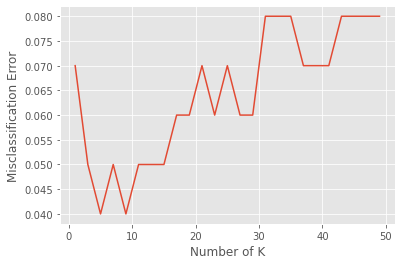

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(neighbors,MSE)
plt.xlabel("Number of K")
plt.ylabel("Misclassification Error")
plt.show()